In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression


In [ ]:
import matplotlib
import numpy as np

X_LABEL = "X_LABEL"
Y_LABEL = "Y_LABEL"
LOG_SCALE = "LOG_SCALE"

def get_data_sorted(name, data):
    """
    Takes the dataset and the name of column on which it sorts
    return python, matlab dataset
    """
    data = data.sort_values(by=[name])  # sort sulle dimensioni delle matrici in ordine crescente
    data_python = data.loc[data['Language'] == 1]
    data_matlab = data.loc[data['Language'] == 0]
    return data_python, data_matlab


def read_data(name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    return pd.read_csv(path)


def write_data(df, name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    df.to_csv(path, index=False)

def plot(labels, data_py, data_matlab, x_name, y_name, title, **keywords):

    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Line Plot)"

    plt.plot(labels, data_py, label="Windows", linestyle="-")
    plt.plot(labels, data_matlab, label="Linux", linestyle="--")
    show(x_name, y_name, title, **keywords)


def bar_plot(labels, data_py, data_matlab, x_name, y_name, title, **keywords):
    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Bar Plot)"

    x_axis = np.arange(len(labels))

    # Multi bar Chart

    plt.bar(x_axis -0.2, data_py, width=0.4, label = 'Windows')
    plt.bar(x_axis +0.2, data_matlab, width=0.4, label = 'Linux')

    # Xticks

    plt.xticks(x_axis, labels)
    show(x_name, y_name, title, **keywords)



def show(x_name, y_name, title, **keywords):

    x_label, y_label = "", ""
    if X_LABEL in keywords.keys():
        x_label = f"({keywords[X_LABEL]})"
    if Y_LABEL in keywords.keys():
        y_label = f"({keywords[Y_LABEL]})"
    if LOG_SCALE in keywords.keys():
        plt.yscale('log') # logarithmic scale

    plt.xlabel(f"{x_name} {x_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.ylabel(f"{y_name} {y_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.title(title, fontsize=18, color="#333533", pad=35)

    # removing axes from the figure
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(loc='upper center',ncol=2,frameon=False)
    plt.show()


def correlation(x, y, x_name, y_name):
    figure(figsize=(20, 6), dpi=80)
    title = f"Scatter-plot variables '{x_name}' and '{y_name}'"
    my_rho = np.corrcoef(x, y) # Correlation Coefficient
    print(my_rho)

    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(x, y)
    plt.plot(x, y, color = "g")
    show(x_name, y_name, title)



Data Loading

In [ ]:
data = read_data("data.csv")

data.sort_values(by="Rows", ascending=True, inplace=True)
data.head()

# MATLAB

In [ ]:
# Filters rows by OS
data_mat = data[data.Language == 0]
data_mat.head()

data_mat_win = data_mat[data_mat.OS == 0]
data_mat_lin = data_mat[data_mat.OS == 1]

## Error

In MATLAB gli errori Relativi tra i due Sistemi Operativi sono identici, quindi le due linee si sovrappongono per tutte le matrici

[6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12]
[6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12]


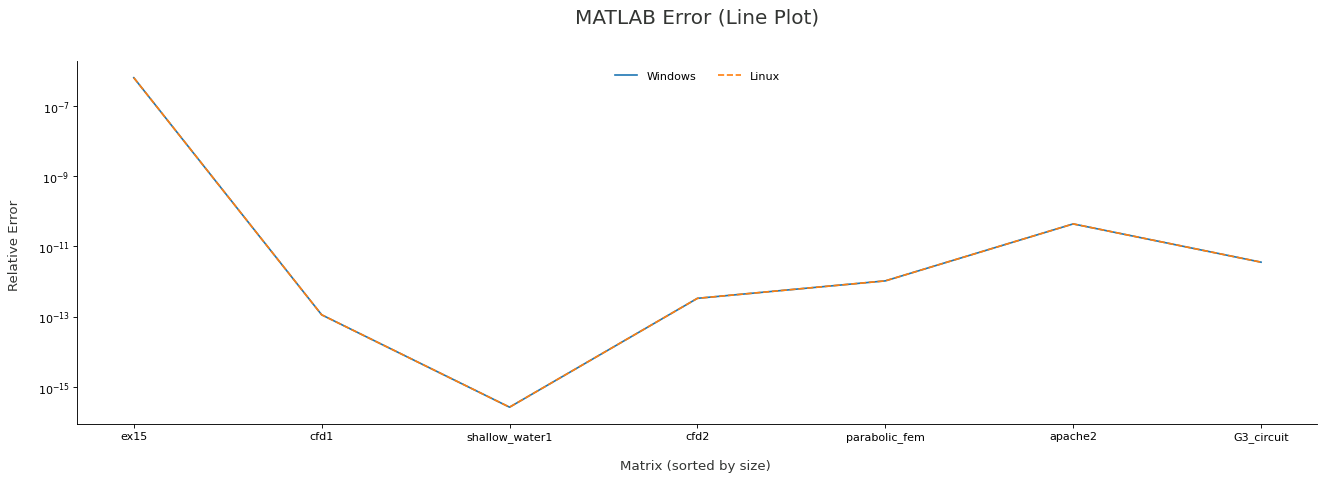

In [ ]:
mat_win_errors = data_mat_win.Error.tolist()
mat_lin_errors = data_mat_lin.Error.tolist()
print(mat_win_errors)
print(mat_lin_errors)

matrix_names = data_mat_win.Name.tolist()

plot(matrix_names, mat_win_errors, mat_lin_errors, 'Matrix (sorted by size)', 'Relative Error', 'MATLAB Error', LOG_SCALE=True)

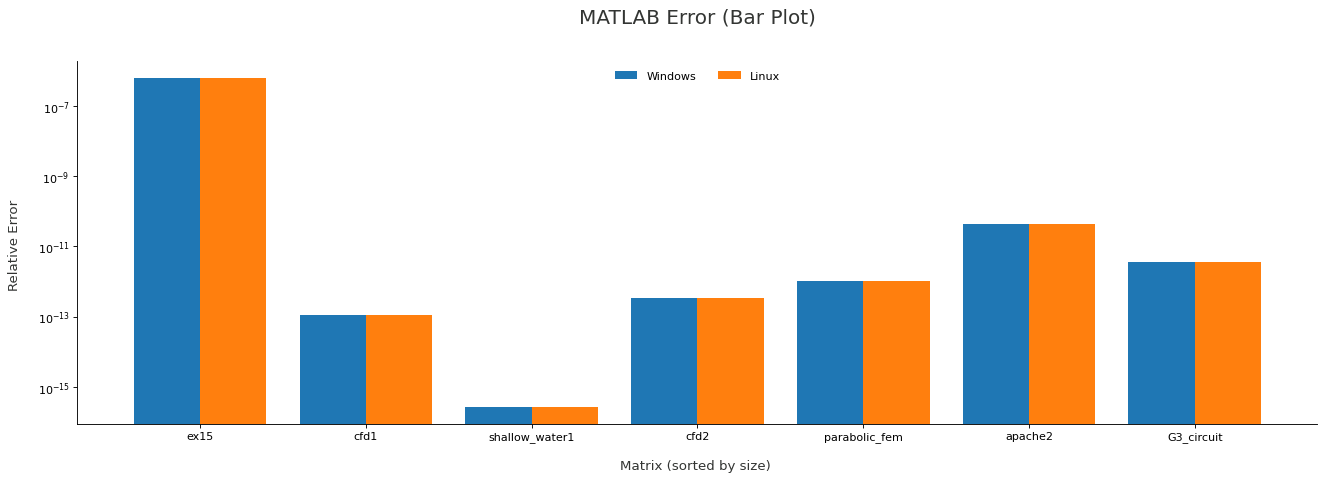

In [ ]:
bar_plot(matrix_names, mat_win_errors, mat_lin_errors, 'Matrix (sorted by size)', 'Relative Error', 'MATLAB Error', LOG_SCALE=True)

## Memory

Utilizzo di memoria sempre molto simile, ma Linux leggermente meglio in tutte, con differenza leggermente marcata in *parabolic_fem, apache2 e G3_circuit*

C'è comunque da considerare che tra Windows e Linux sono state usate due funzioni differenzi per il tracking della memoria, e non si sa con certezza se questo ha potuto impattare la misurazione

[3.6168, 577.5852, 41.5662, 1187.7089, 607.6006, 2877.0181, 3262.5295]
[0.0, 560.592, 0.0, 1145.468, 538.452, 2769.992, 3203.66]


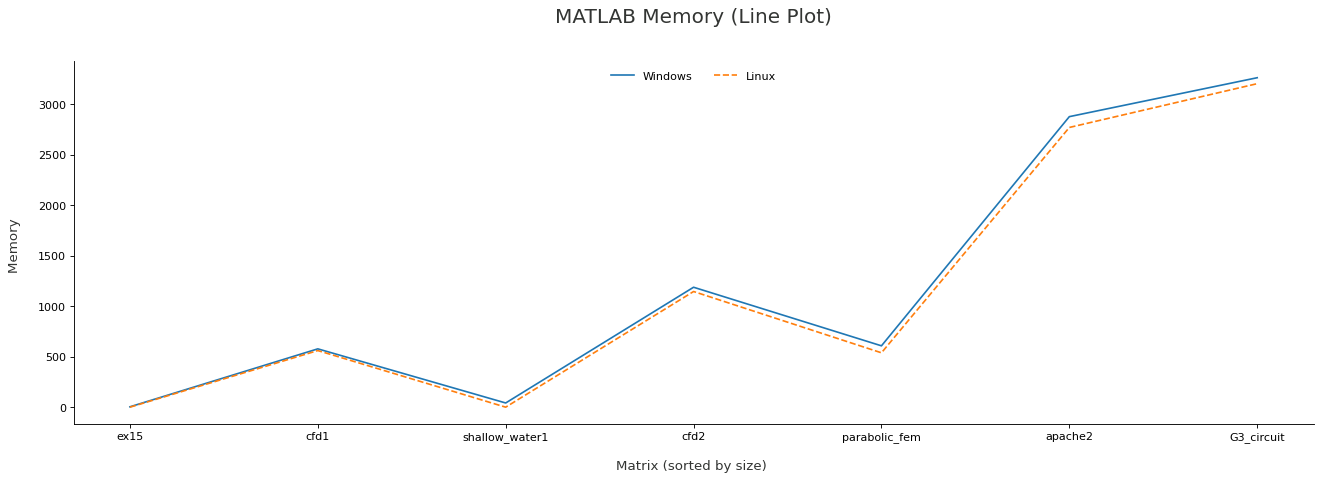

In [ ]:
mat_win_mem = data_mat_win.Memory.tolist()
mat_lin_mem = data_mat_lin.Memory.tolist()
print(mat_win_mem)
print(mat_lin_mem)

matrix_names = data_mat_win.Name.tolist()

plot(matrix_names, mat_win_mem, mat_lin_mem, "Matrix (sorted by size)", "Memory", "MATLAB Memory")

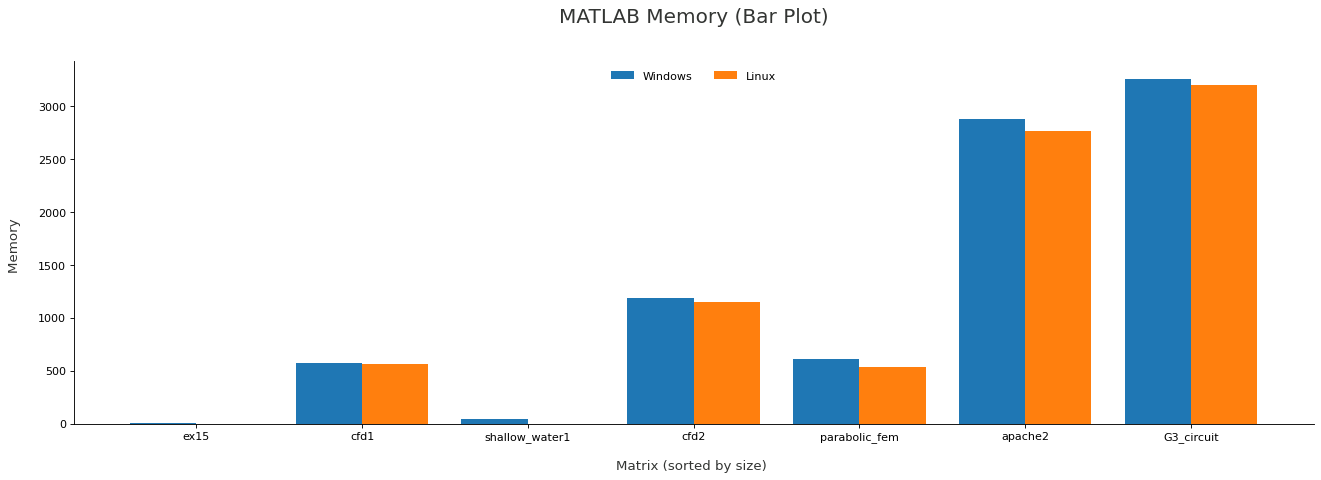

In [ ]:
bar_plot(matrix_names, mat_win_mem, mat_lin_mem, "Matrix (sorted by size)", "Memory", "MATLAB Memory")

## Time

Anche il tempo è molto simile, in generale vince Windows 5-2, Ma a parte per *apache2*, in cui Windows è *1.5s* più veloce, è sempre una differenza in decimi di secondi 

[0.030822, 2.5576, 0.25437, 6.0834, 3.0333, 13.4307, 19.5037]
[0.024699, 2.7237, 0.26305, 6.2418, 3.2869, 15.1453, 18.8832]


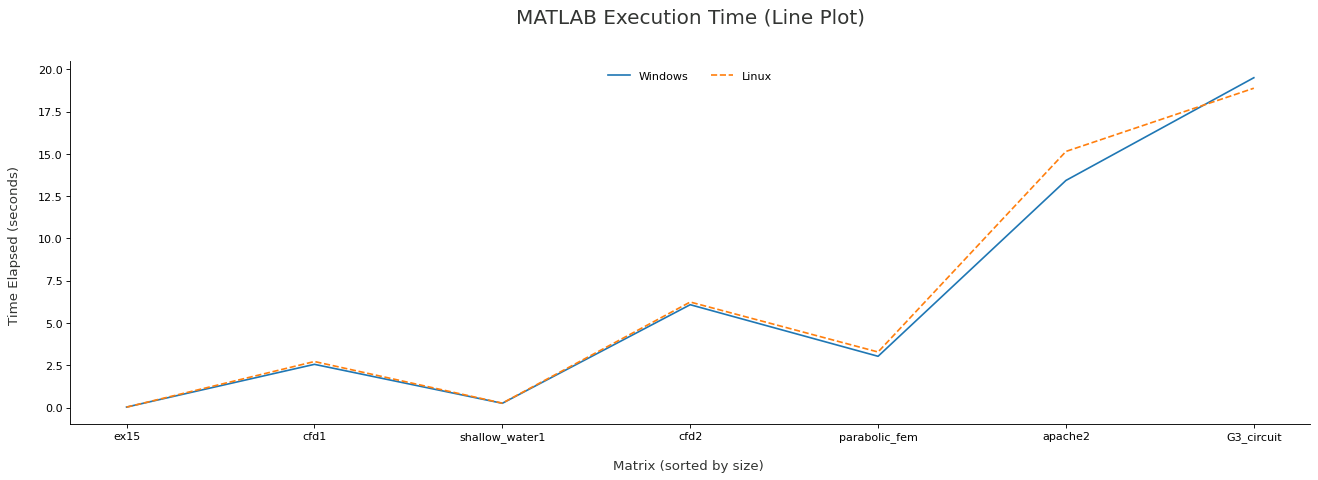

In [ ]:
mat_win_time = data_mat_win.Time.tolist()
mat_lin_time = data_mat_lin.Time.tolist()
print(mat_win_time)
print(mat_lin_time)

matrix_names = data_mat_win.Name.tolist()

plot(matrix_names, mat_win_time, mat_lin_time, "Matrix (sorted by size)", "Time Elapsed (seconds)", "MATLAB Execution Time")

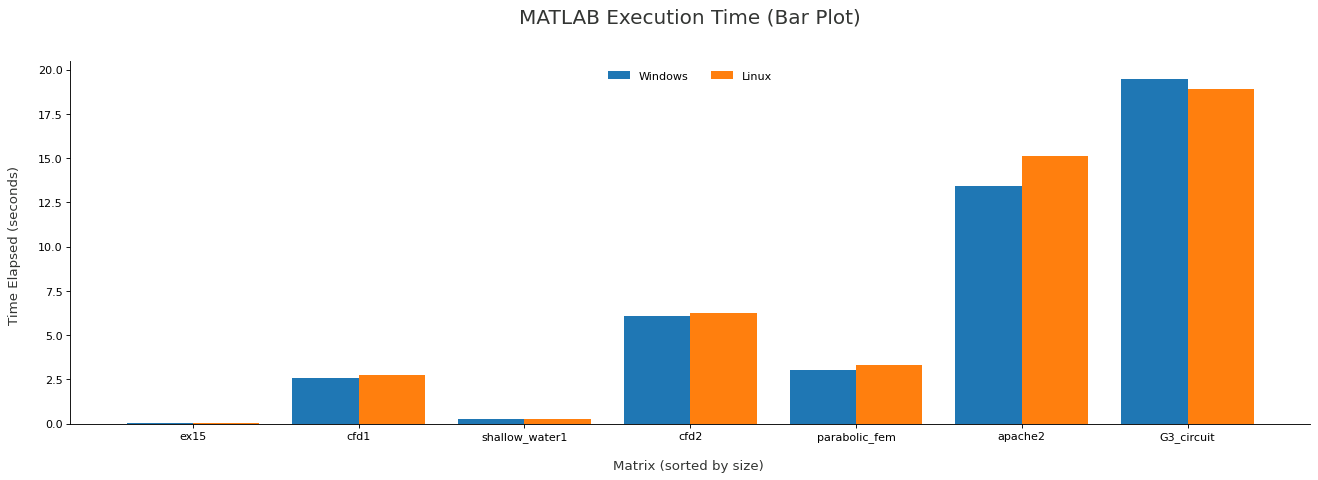

In [ ]:
bar_plot(matrix_names, mat_win_time, mat_lin_time, "Matrix (sorted by size)", "Time Elapsed (seconds)", "MATLAB Execution Time")

# Python

In [ ]:
# Filters rows by OS
data_py = data[data.Language == 1]
data_py.head()

data_py_win = data_py[data_py.OS == 0]
data_py_lin = data_py[data_py.OS == 1]

## Error

Anche in Python gli errori Relativi tra i due Sistemi Operativi sono identici, quindi le due linee si sovrappongono per tutte le matrici

[5.28117015891863e-05, 6.62846322021346e-12, 6.92399203206692e-14, 1.33416072036247e-10, 8.83677937470142e-10, 2.23594130910856e-08, 3.45256793174384e-09]
[5.28117015891863e-05, 6.62846322021346e-12, 6.92399203206692e-14, 1.33416072036247e-10, 8.83677937470142e-10, 2.23594130910856e-08, 3.45256793174384e-09]


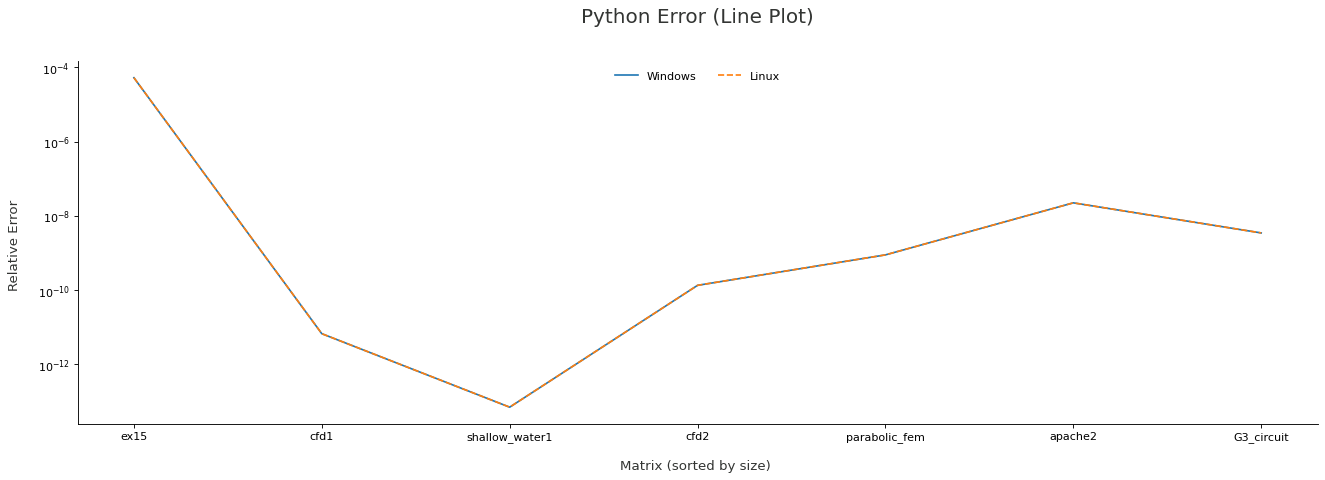

In [ ]:
py_win_errors = data_py_win.Error.tolist()
py_lin_errors = data_py_lin.Error.tolist()
print(py_win_errors)
print(py_lin_errors)

matrix_names = data_py_win.Name.tolist()

plot(matrix_names, py_win_errors, py_lin_errors, 'Matrix (sorted by size)', 'Relative Error', 'Python Error', LOG_SCALE=True)

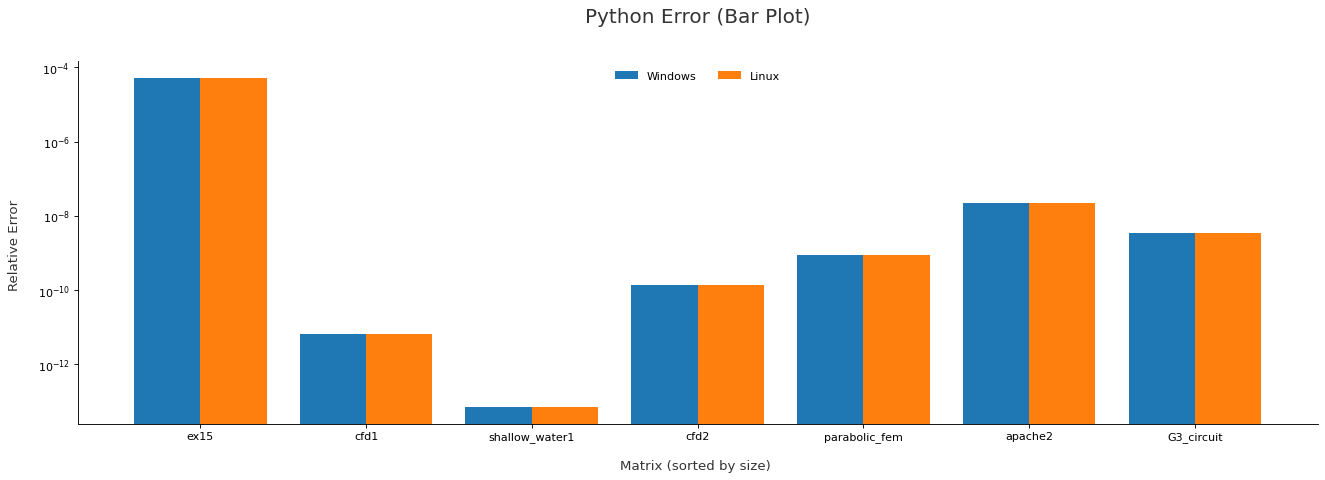

In [ ]:
bar_plot(matrix_names, py_win_errors, py_lin_errors, 'Matrix (sorted by size)', 'Relative Error', 'Python Error', LOG_SCALE=True)

## Memory

???


[0.003326416015625, 0.003326416015625, 9.06751441955566, 0.003326416015625, 0.003326416015625, 0.004470825195313, 210.620558738708]
[2.66462326049805, 49.466570854187, 0.003326416015625, 0.003326416015625, 0.003326416015625, 131.386811256409, 0.003326416015625]


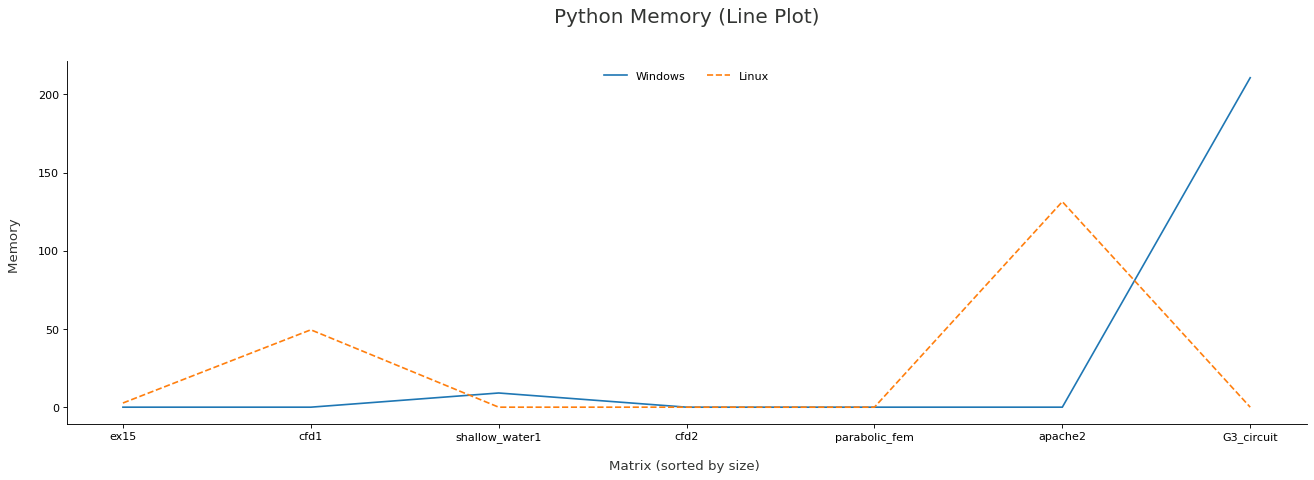

In [ ]:
py_win_mem = data_py_win.Memory.tolist()
py_lin_mem = data_py_lin.Memory.tolist()
print(py_win_mem)
print(py_lin_mem)

matrix_names = data_py_win.Name.tolist()

plot(matrix_names, py_win_mem, py_lin_mem, "Matrix (sorted by size)", "Memory", "Python Memory")

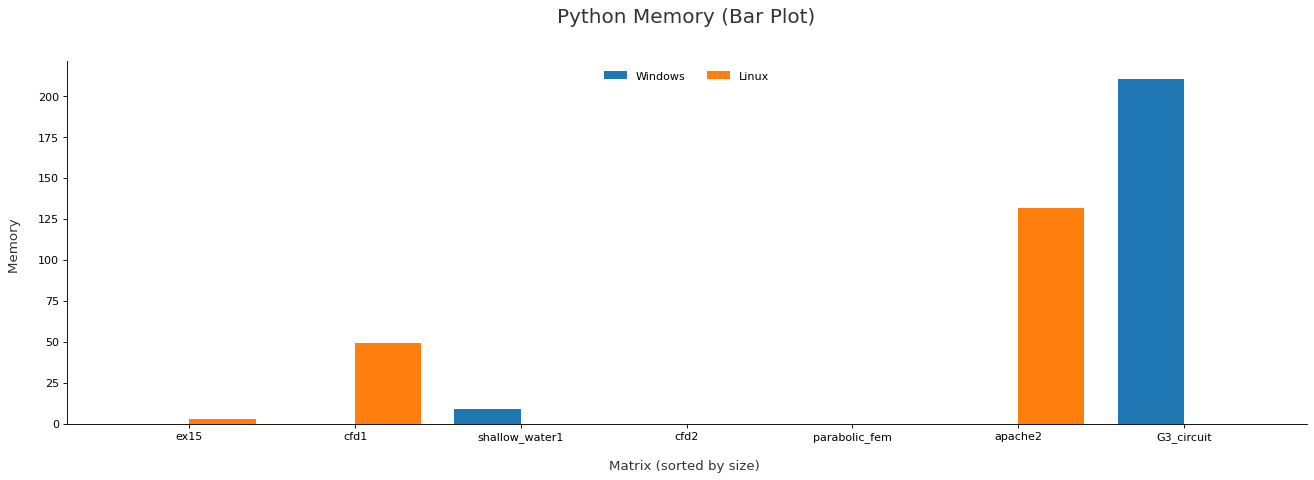

In [ ]:
bar_plot(matrix_names, py_win_mem, py_lin_mem, "Matrix (sorted by size)", "Memory", "Python Memory")

## Time

In Python il vantaggio di Windows è più marcato, che è più veloce di Linux per tutte le matrici, soprattutto *apache2*, con *17s* di differenza, e *G3_circuit*, con *6s*

[0.015077590942383, 4.46198153495789, 0.615064144134522, 10.9170985221863, 6.43960165977478, 66.2321915626526, 27.9392647743225]
[0.022155523300171, 5.38265681266785, 0.745701313018799, 13.4831767082214, 7.92075800895691, 83.3728008270264, 33.8106868267059]


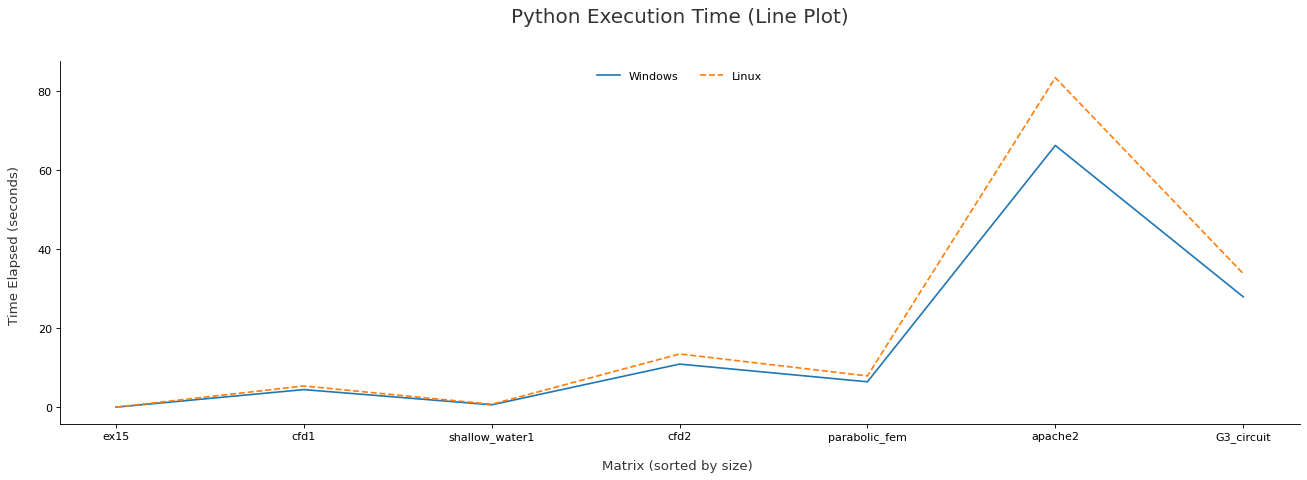

In [ ]:
py_win_time = data_py_win.Time.tolist()
py_lin_time = data_py_lin.Time.tolist()
print(py_win_time)
print(py_lin_time)

matrix_names = data_py_win.Name.tolist()

plot(matrix_names, py_win_time, py_lin_time, "Matrix (sorted by size)", "Time Elapsed (seconds)", "Python Execution Time")

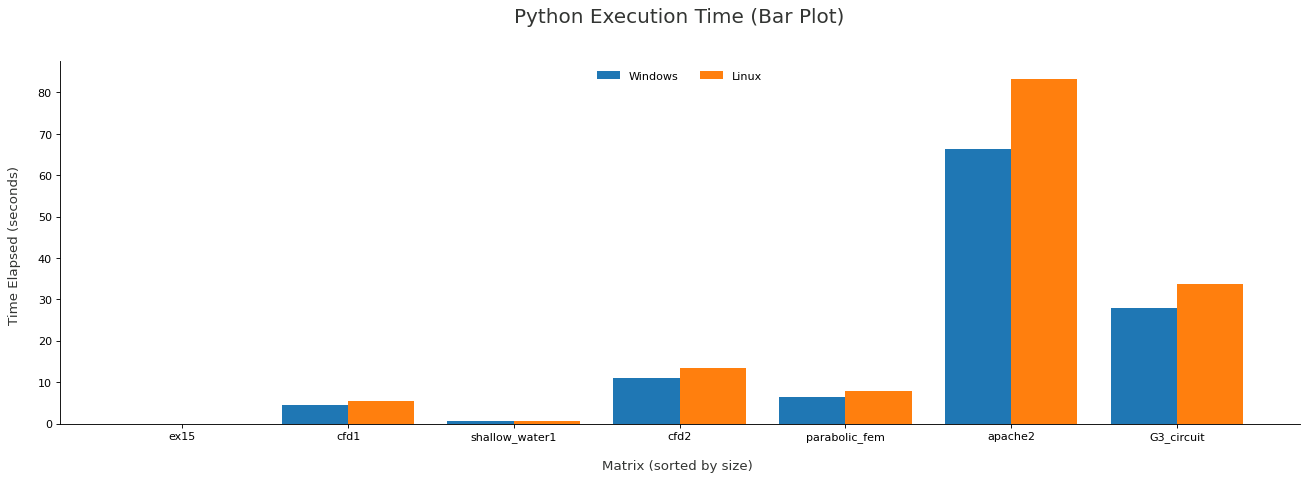

In [ ]:

bar_plot(matrix_names, py_win_time, py_lin_time, "Matrix (sorted by size)", "Time Elapsed (seconds)", "Python Execution Time")

# Correlazione Errore - Condizionamento

0.92 per Python e 1 per MATLAB

Il Sistema Operativo non fa differenza

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1. 1.]
 [1. 1.]]


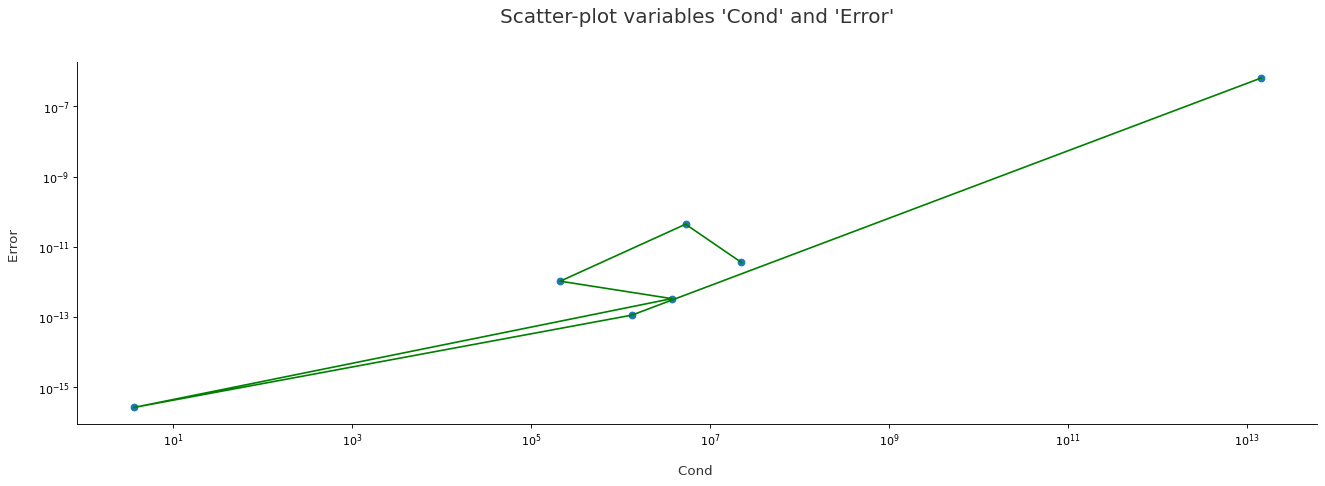

In [ ]:
x = np.array(data_mat_lin['Cond'])
y = np.array(data_mat_lin['Error'])

correlation(x, y, "Cond", "Error")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1. 1.]
 [1. 1.]]


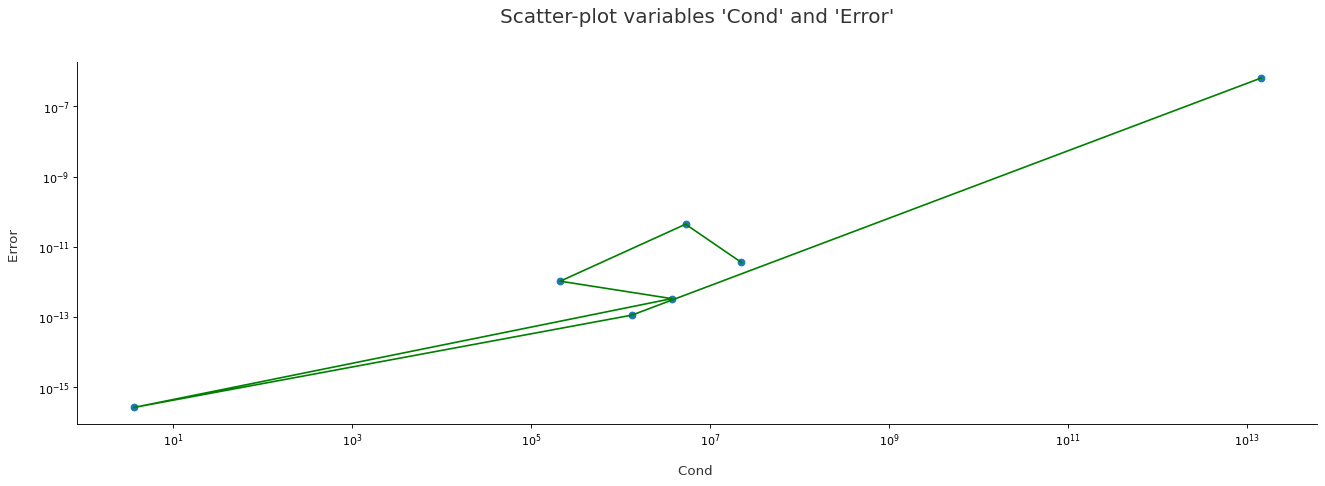

In [ ]:
x = np.array(data_mat_win['Cond'])
y = np.array(data_mat_win['Error'])

correlation(x, y, "Cond", "Error")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.99999992]
 [0.99999992 1.        ]]


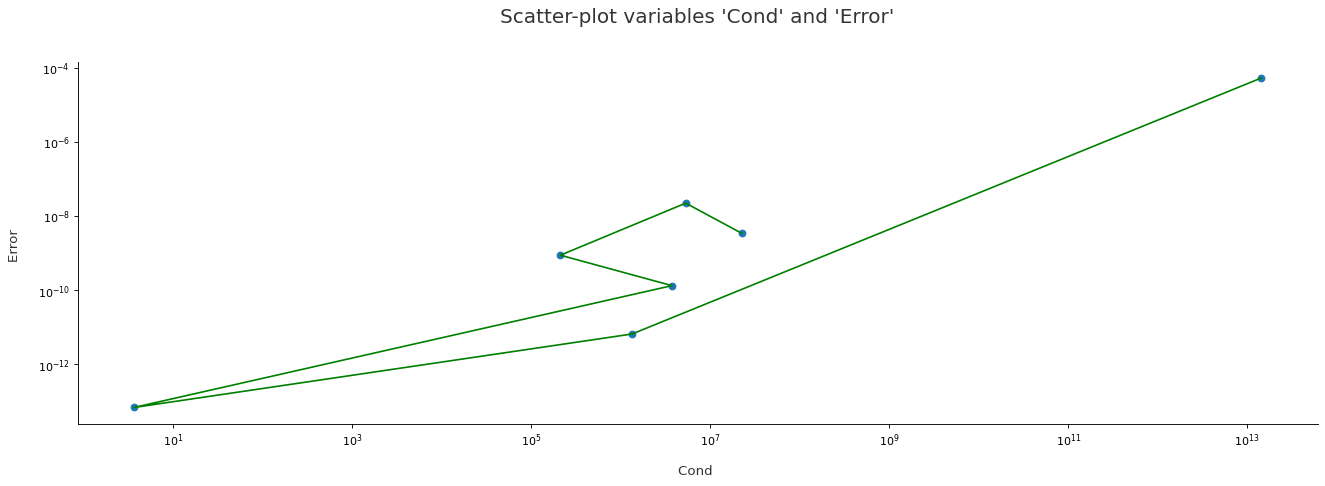

In [ ]:
x = np.array(data_py_lin['Cond'])
y = np.array(data_py_lin['Error'])

correlation(x, y, "Cond", "Error")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.99999992]
 [0.99999992 1.        ]]


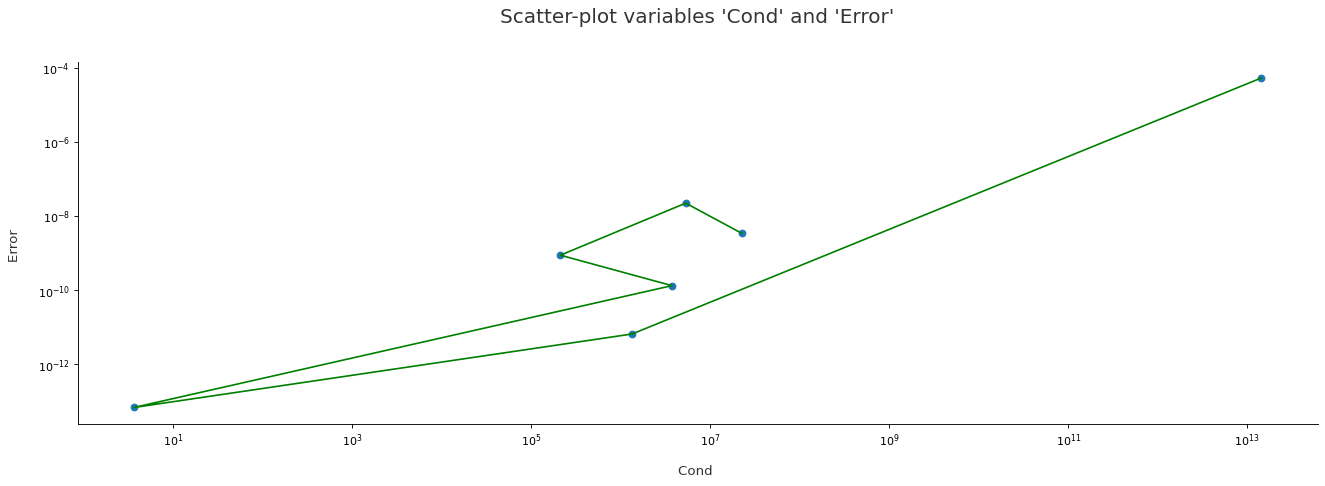

In [ ]:
x = np.array(data_py_win['Cond'])
y = np.array(data_py_win['Error'])

correlation(x, y, "Cond", "Error")